<a href="https://colab.research.google.com/github/rohitrv8922/rohitrv8922/blob/main/Product_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Connect to the google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Loading Amazon dataset sample**

In [3]:
amz=pd.read_csv('/content/drive/MyDrive/DS - Assignment Part 2 data set/amz_com-ecommerce_sample.csv',encoding='latin-1')
amz.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
flp=pd.read_csv('/content/drive/MyDrive/DS - Assignment Part 2 data set/flipkart_com-ecommerce_sample.csv',encoding='latin-1')
flp.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


#Data Preprocessing

**Lets check the data type of each columns**

In [5]:
flp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

**Checking null values**

In [6]:
flp.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

**Number of products of Flipkart**

In [17]:
flp['product_name'].value_counts()

TheLostPuppy Back Cover for Apple iPad Air                               134
TheLostPuppy Back Cover for Apple iPad Air 2                              95
S4S Stylish Women's Push-up Bra                                           94
Voylla Metal, Alloy Necklace                                              66
WallDesign Small Vinyl Sticker                                            65
                                                                        ... 
Naxa Electronics Naxa Ne-929 Wh Headphones () Headphones                   1
Kanu Book Cover for Champion Wtab 705 7 inch                               1
TIGI BED HEAD COLOUR GODDESS OIL INFUSED CONDITIONER                       1
Takspin casual collection of clutcher & hair pin (set of 7) Hair Claw      1
Uberlyfe Extra Large Vinyl Sticker                                         1
Name: product_name, Length: 12676, dtype: int64

**Check data type of each column in Amazon dataset**

In [9]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  20000 non-null  object
 1   crawl_timestamp          20000 non-null  object
 2   product_url              20000 non-null  object
 3   product_name             20000 non-null  object
 4   product_category_tree    20000 non-null  object
 5   pid                      20000 non-null  object
 6   retail_price             20000 non-null  int64 
 7   discounted_price         20000 non-null  int64 
 8   image                    19997 non-null  object
 9   is_FK_Advantage_product  20000 non-null  bool  
 10  description              19998 non-null  object
 11  product_rating           20000 non-null  object
 12  overall_rating           20000 non-null  object
 13  brand                    14136 non-null  object
 14  product_specifications   19986 non-nul

#Data Cleaning

**Null values or missing values in Amazon data**

**Removin

In [10]:
amz.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

**Remove null values**

In [11]:
amz=amz.dropna()

In [12]:
amz.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [13]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  14121 non-null  object
 1   crawl_timestamp          14121 non-null  object
 2   product_url              14121 non-null  object
 3   product_name             14121 non-null  object
 4   product_category_tree    14121 non-null  object
 5   pid                      14121 non-null  object
 6   retail_price             14121 non-null  int64 
 7   discounted_price         14121 non-null  int64 
 8   image                    14121 non-null  object
 9   is_FK_Advantage_product  14121 non-null  bool  
 10  description              14121 non-null  object
 11  product_rating           14121 non-null  object
 12  overall_rating           14121 non-null  object
 13  brand                    14121 non-null  object
 14  product_specifications   14121 non-nul

**Count no of products of different brands in Amazon**

In [14]:
amz['brand'].value_counts()

Allure Auto        469
Regular            313
Voylla             299
Slim               288
TheLostPuppy       229
                  ... 
Lucky Thailand       1
Loreal Paris         1
CLASSY               1
ORIFLAME SWEDEN      1
Fun To See           1
Name: brand, Length: 3495, dtype: int64

In [15]:
amz['product_name'].value_counts()

THELOSTPUPPY BACK COVER FOR APPLE IPAD AIR                       141
THELOSTPUPPY BACK COVER FOR APPLE IPAD AIR 2                      95
S4S Stylish Women's Push-up Bra                                   94
Voylla Metal, Alloy Necklace                                      66
HomeeHub Polyester Multicolor Self Design Eyelet Door Curtain     58
                                                                ... 
Tenda F300                                                         1
Tenda N60                                                          1
Junk Diva Glass Necklace                                           1
Tenda TE-D820R                                                     1
UBERLYFE EXTRA LARGE VINYL STICKER                                 1
Name: product_name, Length: 8966, dtype: int64

#Data Visualization

**Amazon products plot here we can clearly see that  most of the prices are from 500 to 2000**

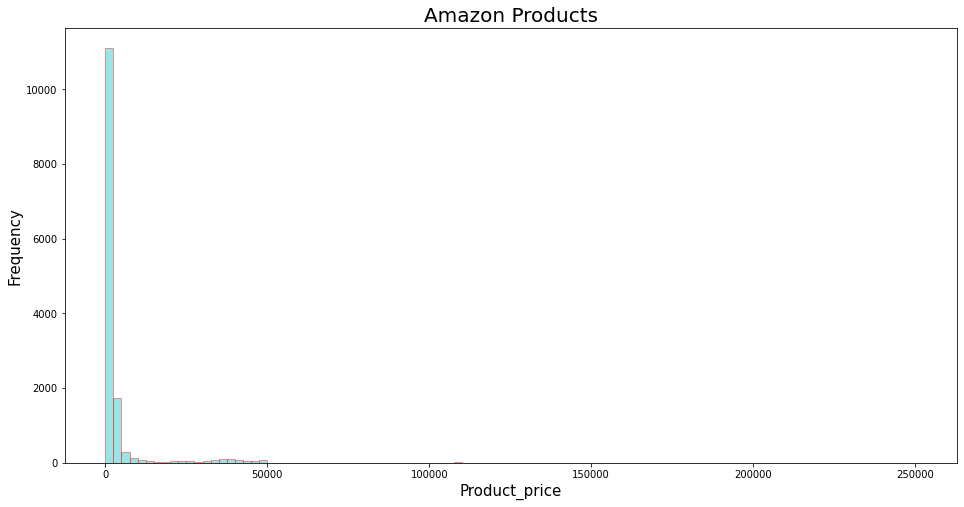

In [21]:
plt.figure(figsize=(16,8))
plt.hist(x='retail_price',bins=100,data=amz,color='c',alpha=0.4,edgecolor='r')
plt.xlabel('Product_price',size=15)
plt.ylabel('Frequency',size=15)
plt.title('Amazon Products',size=20)
plt.show()

**In this plot we can observe that most of the discount prices were upto 500**

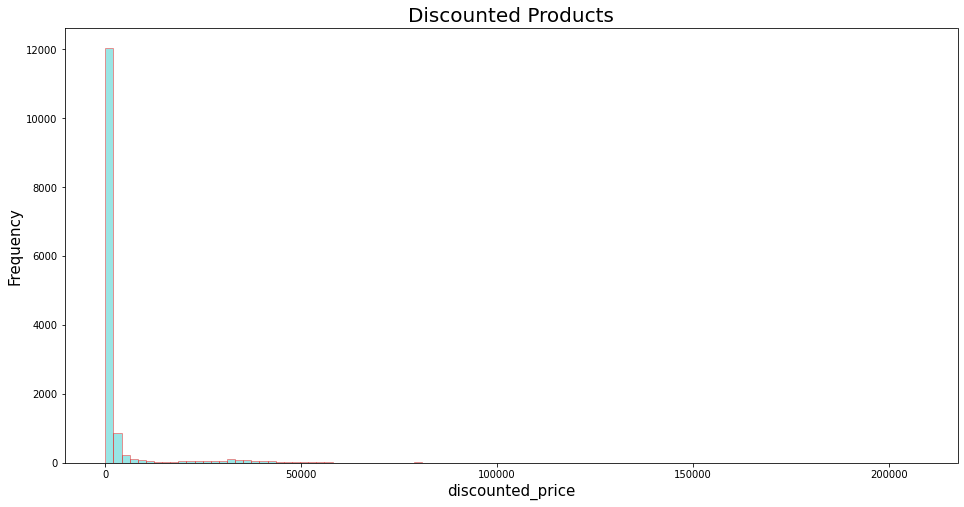

In [23]:
plt.figure(figsize=(16,8))
plt.hist(x='discounted_price',bins=100,data=amz,color='c',alpha=0.4,edgecolor='r')
plt.xlabel('discounted_price',size=15)
plt.ylabel('Frequency',size=15)
plt.title('Discounted Products',size=20)
plt.show()

In [24]:
x=list(amz['brand'].value_counts().keys()[0:20])
y=list(amz['brand'].value_counts().keys()[0:20])

**This plot clearly shows that the top most brand of Amazon is DeStudio** 

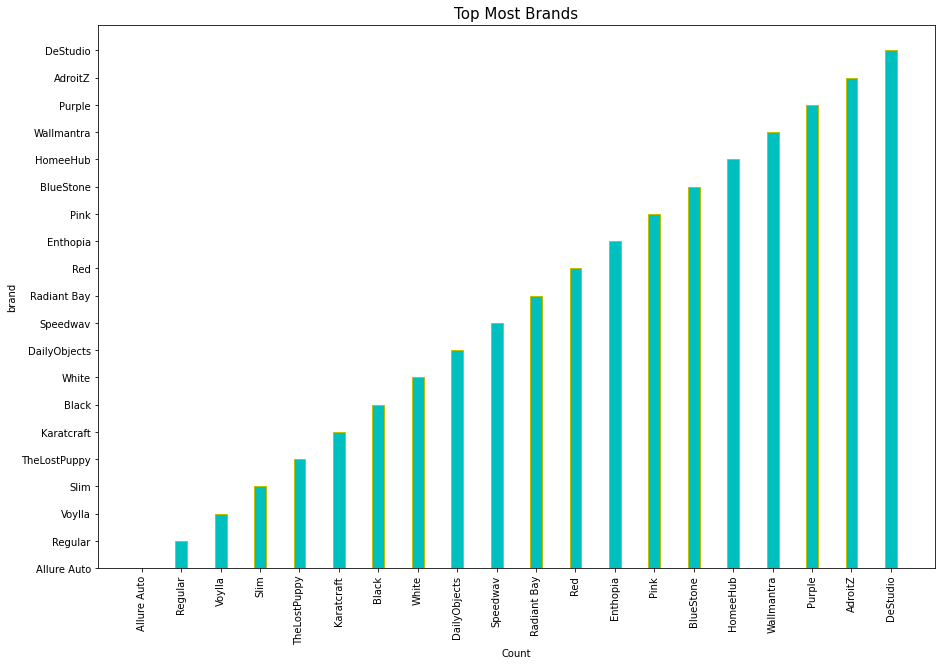

In [27]:
plt.figure(figsize=(15,10))
plt.bar(x,y,color='c',width=0.3,edgecolor='y')
plt.xlabel('Count')
plt.ylabel('brand')
plt.title('Top Most Brands',size=15)
plt.xticks(size=10,rotation=90)
plt.show()

**This plot tell us clearly that most of the prices of the Flipkart products are starting from 100 upto 5000**

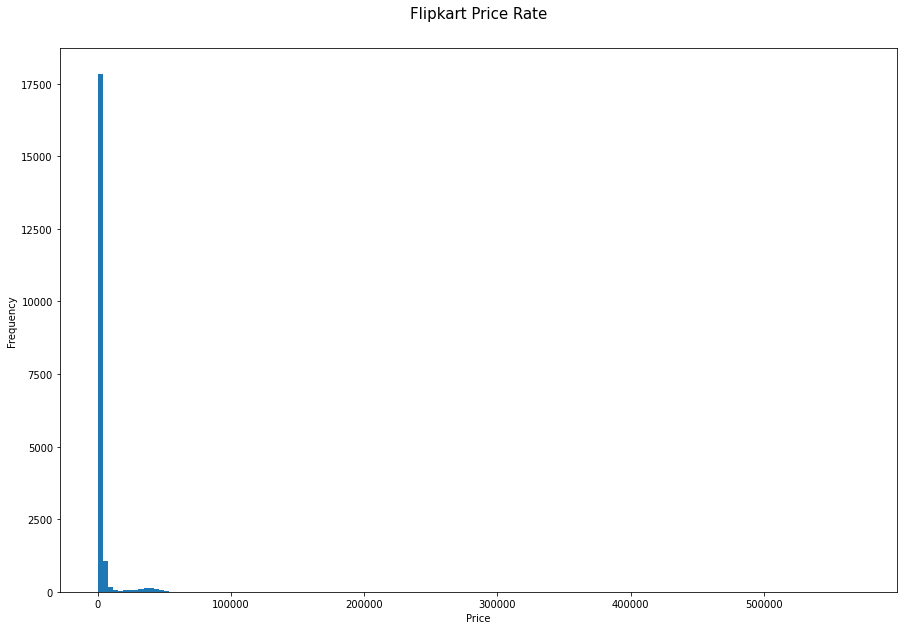

In [29]:
plt.figure(figsize=(15,10))
plt.hist(x=flp['retail_price'],bins=150)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Flipkart Price Rate',pad=30,size=15)
plt.show()

In [31]:
x1=list(flp['brand'].value_counts().keys()[0:20])
y1=list(flp['brand'].value_counts().keys()[0:20])

**This plot shows that the most populous brand in Flipkart is DeStudio** 

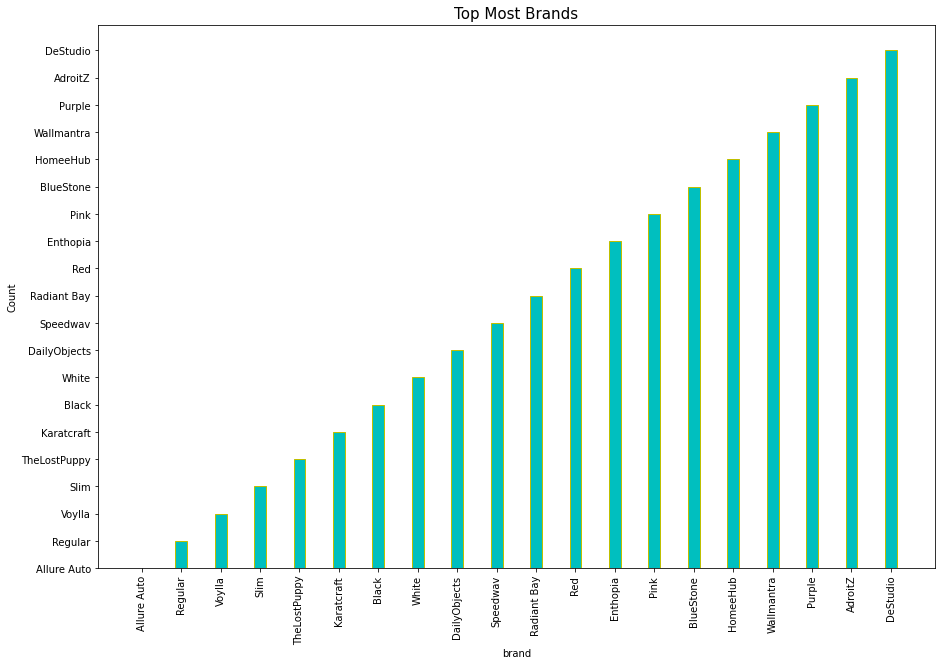

In [32]:
plt.figure(figsize=(15,10))
plt.bar(x1,y1,color='c',width=0.3,edgecolor='y')
plt.ylabel('Count')
plt.xlabel('brand')
plt.title('Top Most Brands',size=15)
plt.xticks(size=10,rotation=90)
plt.show()

** After that we are going to merge our amazon and flipkart dataset to compare the prices of the same products and the discount prices of the products that can help the customer to decide from where they can buy the things.**

In [101]:
data=pd.merge(amz,flp,on='product_name',how='inner')
data.head()

,uniq_id_x,crawl_timestamp_x,product_url_x,product_name,product_category_tree_x,pid_x,retail_price_x,discounted_price_x,image_x,is_FK_Advantage_product_x,...,pid_y,retail_price_y,discounted_price_y,image_y,is_FK_Advantage_product_y,description_y,product_rating_y,overall_rating_y,brand_y,product_specifications_y
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
2,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FVUHAAVH9X,1199.0,479.0,"[""http://img5a.flixcart.com/image/short/5/z/c/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FGBDJGX8FW,999.0,379.0,"[""http://img6a.flixcart.com/image/short/q/z/v/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."


**After merging the dataset we  are checking the columns of our new dataset**

In [102]:
data.columns

Index(['uniq_id_x', 'crawl_timestamp_x', 'product_url_x', 'product_name',
       'product_category_tree_x', 'pid_x', 'retail_price_x',
       'discounted_price_x', 'image_x', 'is_FK_Advantage_product_x',
       'description_x', 'product_rating_x', 'overall_rating_x', 'brand_x',
       'product_specifications_x', 'uniq_id_y', 'crawl_timestamp_y',
       'product_url_y', 'product_category_tree_y', 'pid_y', 'retail_price_y',
       'discounted_price_y', 'image_y', 'is_FK_Advantage_product_y',
       'description_y', 'product_rating_y', 'overall_rating_y', 'brand_y',
       'product_specifications_y'],
      dtype='object')

**In the above part we can see that all the colums are of different columns names but their products are similiar, that why we are going to rename some columns .So that it become easy to compare the products on the same basis.**

In [132]:
data=data.rename(columns={'product_name':'Product Name','brand_x':'Brand Name','brand_y':'Brand Name','retail_price_x':'Amazon Price','retail_price_y':'Flipkart Price','discounted_price_x':'Amazon Discount','discounted_price_y':'Flipkart Discount'})

In [133]:
data.head()

,Product Name,Amazon Price,Amazon Discount,Brand Name,Flipkart Price,Flipkart Discount,Brand Name
0,Alisha Solid Women's Cycling Shorts,982,438,Alisha,999.0,379.0,Alisha
1,Alisha Solid Women's Cycling Shorts,982,438,Alisha,699.0,267.0,Alisha
2,Alisha Solid Women's Cycling Shorts,982,438,Alisha,1199.0,479.0,Alisha
3,Alisha Solid Women's Cycling Shorts,982,438,Alisha,1199.0,479.0,Alisha
4,Alisha Solid Women's Cycling Shorts,982,438,Alisha,999.0,379.0,Alisha


**Here we can see that prices of the Amazon products are low as compare to the price of Flipkart products**

**Difference between Amazon and Flipkart Prices** 

**Here we can see that prices of the Amazon products are low as compare to the price of Flipkart products**

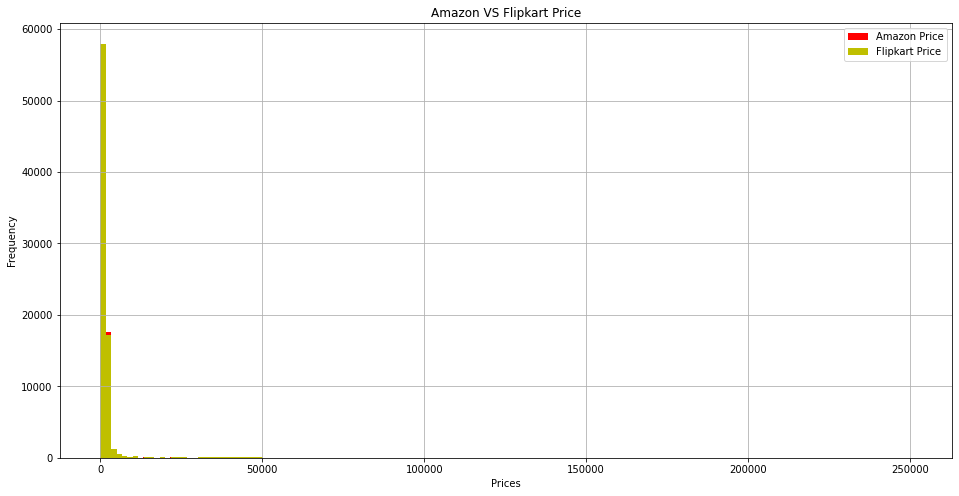

In [144]:
plt.figure(figsize=(16,8))
plt.hist(x=data['Amazon Price'],bins=150,color='r',label='Amazon Price')
plt.hist(x=data['Flipkart Price'],bins=150,color='y',label='Flipkart Price')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Amazon VS Flipkart Price')
plt.legend(loc=1)
plt.grid()
plt.show()

**Difference between Amazon and Flipkart Discount Prices**

**Here we can see that discount prices of the Amazon products are greater as compare to the discount price of Flipkart products**

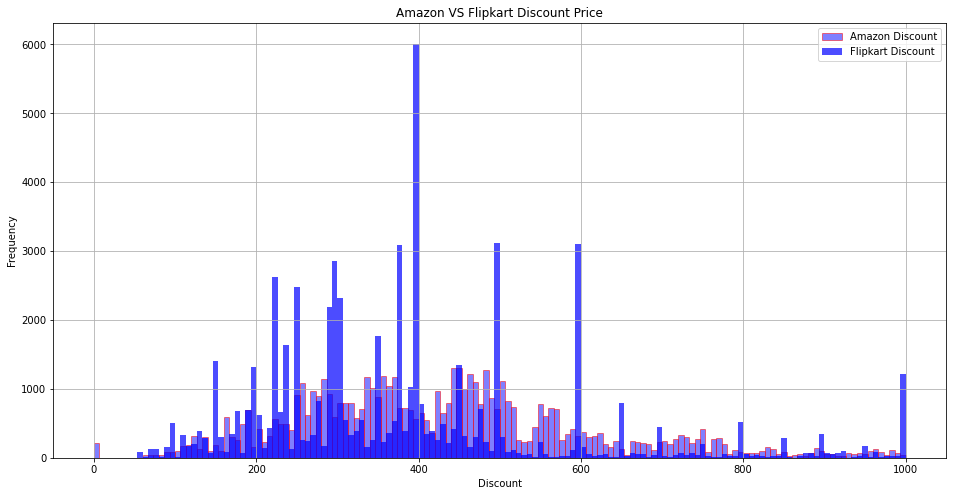

In [143]:
plt.figure(figsize=(16,8))
plt.hist(x=data['Amazon Discount'],edgecolor='r',bins=150,alpha=0.5,fc=(0,0,1,0.7),label='Amazon Discount',range=[0,1000])
plt.hist(x=data['Flipkart Discount'],bins=150,color='k',fc=(0,0,1,0.7),label='Flipkart Discount',range=[0,1000])
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Amazon VS Flipkart Discount Price')
plt.legend(loc=1)
plt.grid()
plt.show()

#Conclusion

**1. Product prices of the Amazon are low and the prices of Flipkart are greater as compare to Amazon.**

**2. Discount prices of Amazon is greater than Flipkart.**

**3. Top product brand in Amazon and Flipkart is the same that is DeStudio.**

**4. Finally i have concluded that customers are more likely to buy their products from Amazon as compare to Flipkart.**

**5. Due to small data some relevant points are still left.**